# The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 1
-----
## Project 1: Understanding Student Success with Naive Bayes
-----
###### Student Name(s): Bingkun Chen
###### Python version: Python3
###### Submission deadline: 11am, Wed 22 Apr 2019

This iPython notebook is a template which you will use for your Project 1 submission. 

Marking will be applied on the five functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 

In [89]:
# The following cells include all of my code for this project 
# For convenience, I have put each function and its description into the corresponding cell.
# Please select all the cells if you want to run my code.
import os
import csv
import math
import random

In [90]:
# This function should open a data file in csv, and transform it into a usable format
def load_data():
    filename = os.path.join(os.getcwd(), "student.csv")
    with open(filename, 'r') as f:
        lines = csv.reader(f)
        dataset = list(lines)
        dataset.pop(0)
    return dataset

In [91]:
# This function should split a data set into a training set and hold-out test set
def split_data(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    testSet = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(testSet))
        trainSet.append(testSet.pop(index))
    print('Split Ratio: ' + str(splitRatio))
    print('Number of trainSet: '+ str(len(trainSet)) +'\n' + 'Number of testSet: ' + str(len(testSet)))
    return [trainSet, testSet]

In [92]:
# This function should build a supervised NB model
# In this function, I used the methods from a Class(DictOperation) to do some dictionary operations which behind the function evaluate().
def train(trainSet):
    do = DictOperation()
    laplace = 0
    # Calculating priors
    grade_count = {'A+' :0, 'A' :0, 'B' :0, 'C' :0, 'D' :0, 'F' :0}
    total_num = len(trainSet)
    for i in range(total_num):
        grade = trainSet[i][-1]
        if grade in grade_count:
            grade_count[grade] += 1
        else:
            print('Incorrect data exists.')
    p_grade = {'A+' :0, 'A' :0, 'B' :0, 'C' :0, 'D' :0, 'F' :0}
    for key in p_grade:
        p_grade[key] = float(grade_count[key] ) /total_num
        if grade_count[key] == 0:
            laplace = 1

    # Calculating likelihoods
    school = {'A+' :{'GP' :0 ,'MS' :0},
              'A' :{'GP' :0 ,'MS' :0},
              'B' :{'GP' :0 ,'MS' :0},
              'C' :{'GP' :0 ,'MS' :0} ,
              'D' :{'GP' :0 ,'MS' :0},
              'F' :{'GP' :0 ,'MS' :0}}

    sex = {'A+' :{'F' :0 ,'M' :0},
           'A' :{'F' :0 ,'M' :0},
           'B' :{'F' :0 ,'M' :0},
           'C' :{'F' :0 ,'M' :0},
           'D' :{'F' :0 ,'M' :0},
           'F' :{'F' :0 ,'M' :0}}

    address = {'A+' :{'U' :0 ,'R' :0},
               'A' :{'U' :0 ,'R' :0},
               'B' :{'U' :0 ,'R' :0},
               'C' :{'U' :0 ,'R' :0},
               'D' :{'U' :0 ,'R' :0},
               'F' :{'U' :0 ,'R' :0}}

    famsize = {'A+' :{'LE3' :0 ,'GT3' :0},
               'A' :{'LE3' :0 ,'GT3' :0},
               'B' :{'LE3' :0 ,'GT3' :0},
               'C' :{'LE3' :0 ,'GT3' :0},
               'D' :{'LE3' :0 ,'GT3' :0},
               'F' :{'LE3' :0 ,'GT3' :0}}

    Pstatus = {'A+' :{'T' :0 ,'A' :0},
               'A' :{'T' :0 ,'A' :0},
               'B' :{'T' :0 ,'A' :0},
               'C' :{'T' :0 ,'A' :0},
               'D' :{'T' :0 ,'A' :0},
               'F' :{'T' :0 ,'A' :0}}

    Medu = {'A+' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'A' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'B' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'C' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'D' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'F' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0}}

    Fedu = {'A+' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'A' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'B' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'C' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'D' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0},
            'F' :{'low' :0 ,'none' :0 ,'mid' :0 ,'high' :0}}

    Mjob = {'A+' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'A' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'B' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'C' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'D' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'F' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0}}

    Fjob = {'A+' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'A' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'B' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'C' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'D' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0},
            'F' :{'teacher' :0 ,'health' :0 ,'services' :0 ,'at_home' :0 ,'other' :0}}

    reason = {'A+' :{'home' :0 ,'reputation' :0 ,'course' :0 ,'other' :0},
              'A' :{'home' :0 ,'reputation' :0 ,'course' :0 ,'other' :0},
              'B' :{'home' :0 ,'reputation' :0 ,'course' :0 ,'other' :0},
              'C' :{'home' :0 ,'reputation' :0 ,'course' :0 ,'other' :0},
              'D' :{'home' :0 ,'reputation' :0 ,'course' :0 ,'other' :0},
              'F' :{'home' :0 ,'reputation' :0 ,'course' :0 ,'other' :0}}

    guardian = {'A+' :{'mother' :0 ,'father' :0 ,'other' :0},
                'A' :{'mother' :0 ,'father' :0 ,'other' :0},
                'B' :{'mother' :0 ,'father' :0 ,'other' :0},
                'C' :{'mother' :0 ,'father' :0 ,'other' :0},
                'D' :{'mother' :0 ,'father' :0 ,'other' :0},
                'F' :{'mother' :0 ,'father' :0 ,'other' :0}}

    traveltime = {'A+' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                  'A' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                  'B' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                  'C' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                  'D' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                  'F' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0}}

    studytime = {'A+' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                 'A' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                 'B' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                 'C' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                 'D' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                 'F' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0}}

    failures = {'A+' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                'A' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                'B' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                'C' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                'D' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0},
                'F' :{'none' :0 ,'low' :0 ,'medium' :0 ,'high' :0 ,'very_high' :0}}

    schoolsup = {'A+' :{'yes' :0 ,'no' :0},
                 'A' :{'yes' :0 ,'no' :0},
                 'B' :{'yes' :0 ,'no' :0},
                 'C' :{'yes' :0 ,'no' :0},
                 'D' :{'yes' :0 ,'no' :0},
                 'F' :{'yes' :0 ,'no' :0}}

    famsup = {'A+' :{'yes' :0 ,'no' :0},
              'A' :{'yes' :0 ,'no' :0},
              'B' :{'yes' :0 ,'no' :0},
              'C' :{'yes' :0 ,'no' :0},
              'D' :{'yes' :0 ,'no' :0},
              'F' :{'yes' :0 ,'no' :0}}

    paid = {'A+' :{'yes' :0 ,'no' :0},
            'A' :{'yes' :0 ,'no' :0},
            'B' :{'yes' :0 ,'no' :0},
            'C' :{'yes' :0 ,'no' :0},
            'D' :{'yes' :0 ,'no' :0},
            'F' :{'yes' :0 ,'no' :0}}

    activities = {'A+' :{'yes' :0 ,'no' :0},
                  'A' :{'yes' :0 ,'no' :0},
                  'B' :{'yes' :0 ,'no' :0},
                  'C' :{'yes' :0 ,'no' :0},
                  'D' :{'yes' :0 ,'no' :0},
                  'F' :{'yes' :0 ,'no' :0}}

    nursery = {'A+' :{'yes' :0 ,'no' :0},
               'A' :{'yes' :0 ,'no' :0},
               'B' :{'yes' :0 ,'no' :0},
               'C' :{'yes' :0 ,'no' :0},
               'D' :{'yes' :0 ,'no' :0},
               'F' :{'yes' :0 ,'no' :0}}

    higher = {'A+' :{'yes' :0 ,'no' :0},
              'A' :{'yes' :0 ,'no' :0},
              'B' :{'yes' :0 ,'no' :0},
              'C' :{'yes' :0 ,'no' :0},
              'D' :{'yes' :0 ,'no' :0},
              'F' :{'yes' :0 ,'no' :0}}

    internet = {'A+' :{'yes' :0 ,'no' :0},
                'A' :{'yes' :0 ,'no' :0},
                'B' :{'yes' :0 ,'no' :0},
                'C' :{'yes' :0 ,'no' :0},
                'D' :{'yes' :0 ,'no' :0},
                'F' :{'yes' :0 ,'no' :0}}

    romantic = {'A+' :{'yes' :0 ,'no' :0},
                'A' :{'yes' :0 ,'no' :0},
                'B' :{'yes' :0 ,'no' :0},
                'C' :{'yes' :0 ,'no' :0},
                'D' :{'yes' :0 ,'no' :0},
                'F' :{'yes' :0 ,'no' :0}}

    famrel = {'A+' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'A' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'B' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'C' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'D' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'F' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0}}

    freetime = {'A+' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
                'A' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
                'B' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
                'C' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
                'D' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
                'F' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0}}

    goout = {'A+' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
             'A' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
             'B' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
             'C' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
             'D' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
             'F' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0}}

    Dalc = {'A+' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'A' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'B' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'C' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'D' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'F' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0}}

    Walc = {'A+' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'A' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'B' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'C' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'D' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
            'F' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0}}

    health = {'A+' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'A' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'B' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'C' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'D' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0},
              'F' :{'1' :0 ,'2' :0 ,'3' :0 ,'4' :0 ,'5' :0}}

    absences = {'A+':{'none':0,'one_to_three':0,'four_to_six':0,'seven_to_ten':0,'more_than_ten':0},
                'A':{'none':0,'one_to_three':0,'four_to_six':0,'seven_to_ten':0,'more_than_ten':0},
                'B':{'none':0,'one_to_three':0,'four_to_six':0,'seven_to_ten':0,'more_than_ten':0},
                'C':{'none':0,'one_to_three':0,'four_to_six':0,'seven_to_ten':0,'more_than_ten':0},
                'D':{'none':0,'one_to_three':0,'four_to_six':0,'seven_to_ten':0,'more_than_ten':0},
                'F':{'none':0,'one_to_three':0,'four_to_six':0,'seven_to_ten':0,'more_than_ten':0}}

    school = do.compute_count(total_num, trainSet, school, 0)
    sex = do.compute_count(total_num, trainSet, sex, 1)
    address = do.compute_count(total_num, trainSet, address, 2)
    famsize = do.compute_count(total_num, trainSet, famsize, 3)
    Pstatus = do.compute_count(total_num, trainSet, Pstatus, 4)
    Medu = do.compute_count(total_num, trainSet, Medu, 5)
    Fedu = do.compute_count(total_num, trainSet, Fedu, 6)
    Mjob = do.compute_count(total_num, trainSet, Mjob, 7)
    Fjob = do.compute_count(total_num, trainSet, Fjob, 8)
    reason = do.compute_count(total_num, trainSet, reason, 9)
    guardian = do.compute_count(total_num, trainSet, guardian, 10)
    traveltime = do.compute_count(total_num, trainSet, traveltime, 11)
    studytime = do.compute_count(total_num, trainSet, studytime, 12)
    failures = do.compute_count(total_num, trainSet, failures, 13)
    schoolsup = do.compute_count(total_num, trainSet, schoolsup, 14)
    famsup = do.compute_count(total_num, trainSet, famsup, 15)
    paid = do.compute_count(total_num, trainSet, paid, 16)
    activities = do.compute_count(total_num, trainSet, activities, 17)
    nursery = do.compute_count(total_num, trainSet, nursery, 18)
    higher = do.compute_count(total_num, trainSet, higher, 19)
    internet = do.compute_count(total_num, trainSet, internet, 20)
    romantic = do.compute_count(total_num, trainSet, romantic, 21)
    famrel = do.compute_count(total_num, trainSet, famrel, 22)
    freetime = do.compute_count(total_num, trainSet, freetime, 23)
    goout = do.compute_count(total_num, trainSet, goout, 24)
    Dalc = do.compute_count(total_num, trainSet, Dalc, 25)
    Walc = do.compute_count(total_num, trainSet, Walc, 26)
    health = do.compute_count(total_num, trainSet, health, 27)
    absences = do.compute_count(total_num, trainSet, absences, 28)

    l0 = do.checkValue(school)
    l1 = do.checkValue(sex)
    l2 = do.checkValue(address)
    l3 = do.checkValue(famsize)
    l4 = do.checkValue(Pstatus)
    l5 = do.checkValue(Medu)
    l6 = do.checkValue(Fedu)
    l7 = do.checkValue(Mjob)
    l8 = do.checkValue(Fjob)
    l9 = do.checkValue(reason)
    l10 = do.checkValue(guardian)
    l11 = do.checkValue(traveltime)
    l12 = do.checkValue(studytime)
    l13 = do.checkValue(failures)
    l14 = do.checkValue(schoolsup)
    l15 = do.checkValue(famsup)
    l16 = do.checkValue(paid)
    l17 = do.checkValue(activities)
    l18 = do.checkValue(nursery)
    l19 = do.checkValue(higher)
    l20 = do.checkValue(internet)
    l21 = do.checkValue(romantic)
    l22 = do.checkValue(famrel)
    l23 = do.checkValue(freetime)
    l24 = do.checkValue(goout)
    l25 = do.checkValue(Dalc)
    l26 = do.checkValue(Walc)
    l27 = do.checkValue(health)
    l28 = do.checkValue(absences)

    l_list = [laplace, l0, l1, l2, l3, l4, l5, l6, l7, l8 ,l9, l10,
              l11, l12, l13, l14, l15, l16, l17, l18, l19, l20, l21,
              l22, l23, l24, l25, l26, l27, l28]
    # Determine whether to use smoothing.
    l_final = 1
    if 1 not in l_list:
        l_final = 0
        print('Not use smoothing')
    else:
        print('Use Laplace smoothing')

    p_school = do.compute_likehood(school, grade_count, l_final, 2)
    p_sex = do.compute_likehood(sex, grade_count, l_final, 2)
    p_address = do.compute_likehood(address, grade_count, l_final, 2)
    p_famsize = do.compute_likehood(famsize, grade_count, l_final, 2)
    p_Pstatus = do.compute_likehood(Pstatus, grade_count, l_final, 2)
    p_Medu = do.compute_likehood(Medu, grade_count, l_final, 4)
    p_Fedu = do.compute_likehood(Fedu, grade_count, l_final, 4)
    p_Mjob = do.compute_likehood(Mjob, grade_count, l_final, 5)
    p_Fjob = do.compute_likehood(Fjob, grade_count, l_final, 5)
    p_reason = do.compute_likehood(reason, grade_count, l_final, 4)
    p_guardian = do.compute_likehood(guardian, grade_count, l_final, 3)
    p_traveltime = do.compute_likehood(traveltime, grade_count, l_final, 5)
    p_studytime = do.compute_likehood(studytime, grade_count, l_final, 5)
    p_failures = do.compute_likehood(failures, grade_count, l_final, 5)
    p_schoolsup = do.compute_likehood(schoolsup, grade_count, l_final, 2)
    p_famsup = do.compute_likehood(famsup, grade_count, l_final, 2)
    p_paid = do.compute_likehood(paid, grade_count, l_final, 2)
    p_activities = do.compute_likehood(activities, grade_count, l_final, 2)
    p_nursery = do.compute_likehood(nursery, grade_count, l_final, 2)
    p_higher = do.compute_likehood(higher, grade_count, l_final, 2)
    p_internet = do.compute_likehood(internet, grade_count, l_final, 2)
    p_romantic = do.compute_likehood(romantic, grade_count, l_final, 2)
    p_famrel = do.compute_likehood(famrel, grade_count, l_final, 5)
    p_freetime = do.compute_likehood(freetime, grade_count, l_final, 5)
    p_goout = do.compute_likehood(goout, grade_count, l_final, 5)
    p_Dalc = do.compute_likehood(Dalc, grade_count, l_final, 5)
    p_Walc = do.compute_likehood(Walc, grade_count, l_final, 5)
    p_health = do.compute_likehood(health, grade_count, l_final, 5)
    p_absences = do.compute_likehood(absences,grade_count,l_final,5)

    p_likelihoods = [p_school, p_sex, p_address, p_famsize, p_Pstatus, p_Medu, p_Fedu,
                     p_Mjob, p_Fjob, p_reason, p_guardian, p_traveltime, p_studytime,
                     p_failures, p_schoolsup, p_famsup, p_paid, p_activities, p_nursery,
                     p_higher, p_internet, p_romantic, p_famrel, p_freetime, p_goout,
                     p_Dalc, p_Walc, p_health, p_absences]
    return [p_grade, p_likelihoods]

In [93]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def predict(testSet,  p_grade, p_likelihoods):
    for i in range(len(testSet)):
        a = []
        lenth = len(testSet[i])
        for j in range(lenth):
            a.append(testSet[i][j])    
        p_Aplus = (p_grade['A+'] * p_likelihoods[0]['A+'][a[0]] * p_likelihoods[1]['A+'][a[1]]
                  * p_likelihoods[2]['A+'][a[2]] * p_likelihoods[3]['A+'][a[3]] * p_likelihoods[4]['A+'][a[4]] 
                  * p_likelihoods[5]['A+'][a[5]] * p_likelihoods[6]['A+'][a[6]] * p_likelihoods[7]['A+'][a[7]] 
                  * p_likelihoods[8]['A+'][a[8]] * p_likelihoods[9]['A+'][a[9]] * p_likelihoods[10]['A+'][a[10]]  
                  * p_likelihoods[11]['A+'][a[11]] * p_likelihoods[12]['A+'][a[12]] * p_likelihoods[13]['A+'][a[13]]
                  * p_likelihoods[14]['A+'][a[14]] * p_likelihoods[15]['A+'][a[15]] * p_likelihoods[16]['A+'][a[16]]
                  * p_likelihoods[17]['A+'][a[17]] * p_likelihoods[18]['A+'][a[18]] * p_likelihoods[19]['A+'][a[19]]
                  * p_likelihoods[20]['A+'][a[20]] * p_likelihoods[21]['A+'][a[21]] * p_likelihoods[22]['A+'][a[22]]
                  * p_likelihoods[23]['A+'][a[23]] * p_likelihoods[24]['A+'][a[24]] * p_likelihoods[25]['A+'][a[25]]
                  * p_likelihoods[26]['A+'][a[26]] * p_likelihoods[27]['A+'][a[27]] * p_likelihoods[28]['A+'][a[28]])
                    
        p_A = (p_grade['A'] * p_likelihoods[0]['A'][a[0]] * p_likelihoods[1]['A'][a[1]]
                  * p_likelihoods[2]['A'][a[2]] * p_likelihoods[3]['A'][a[3]] * p_likelihoods[4]['A'][a[4]] 
                  * p_likelihoods[5]['A'][a[5]] * p_likelihoods[6]['A'][a[6]] * p_likelihoods[7]['A'][a[7]] 
                  * p_likelihoods[8]['A'][a[8]] * p_likelihoods[9]['A'][a[9]] * p_likelihoods[10]['A'][a[10]]  
                  * p_likelihoods[11]['A'][a[11]] * p_likelihoods[12]['A'][a[12]] * p_likelihoods[13]['A'][a[13]]
                  * p_likelihoods[14]['A'][a[14]] * p_likelihoods[15]['A'][a[15]] * p_likelihoods[16]['A'][a[16]]
                  * p_likelihoods[17]['A'][a[17]] * p_likelihoods[18]['A'][a[18]] * p_likelihoods[19]['A'][a[19]]
                  * p_likelihoods[20]['A'][a[20]] * p_likelihoods[21]['A'][a[21]] * p_likelihoods[22]['A'][a[22]]
                  * p_likelihoods[23]['A'][a[23]] * p_likelihoods[24]['A'][a[24]] * p_likelihoods[25]['A'][a[25]]
                  * p_likelihoods[26]['A'][a[26]] * p_likelihoods[27]['A'][a[27]] * p_likelihoods[28]['A'][a[28]])
                    
        p_B = (p_grade['B'] * p_likelihoods[0]['B'][a[0]] * p_likelihoods[1]['B'][a[1]]
                  * p_likelihoods[2]['B'][a[2]] * p_likelihoods[3]['B'][a[3]] * p_likelihoods[4]['B'][a[4]] 
                  * p_likelihoods[5]['B'][a[5]] * p_likelihoods[6]['B'][a[6]] * p_likelihoods[7]['B'][a[7]] 
                  * p_likelihoods[8]['B'][a[8]] * p_likelihoods[9]['B'][a[9]] * p_likelihoods[10]['B'][a[10]]  
                  * p_likelihoods[11]['B'][a[11]] * p_likelihoods[12]['B'][a[12]] * p_likelihoods[13]['B'][a[13]]
                  * p_likelihoods[14]['B'][a[14]] * p_likelihoods[15]['B'][a[15]] * p_likelihoods[16]['B'][a[16]]
                  * p_likelihoods[17]['B'][a[17]] * p_likelihoods[18]['B'][a[18]] * p_likelihoods[19]['B'][a[19]]
                  * p_likelihoods[20]['B'][a[20]] * p_likelihoods[21]['B'][a[21]] * p_likelihoods[22]['B'][a[22]]
                  * p_likelihoods[23]['B'][a[23]] * p_likelihoods[24]['B'][a[24]] * p_likelihoods[25]['B'][a[25]]
                  * p_likelihoods[26]['B'][a[26]] * p_likelihoods[27]['B'][a[27]] * p_likelihoods[28]['B'][a[28]])
                    
        p_C = (p_grade['C'] * p_likelihoods[0]['C'][a[0]] * p_likelihoods[1]['C'][a[1]]
                  * p_likelihoods[2]['C'][a[2]] * p_likelihoods[3]['C'][a[3]] * p_likelihoods[4]['C'][a[4]] 
                  * p_likelihoods[5]['C'][a[5]] * p_likelihoods[6]['C'][a[6]] * p_likelihoods[7]['C'][a[7]] 
                  * p_likelihoods[8]['C'][a[8]] * p_likelihoods[9]['C'][a[9]] * p_likelihoods[10]['C'][a[10]]  
                  * p_likelihoods[11]['C'][a[11]] * p_likelihoods[12]['C'][a[12]] * p_likelihoods[13]['C'][a[13]]
                  * p_likelihoods[14]['C'][a[14]] * p_likelihoods[15]['C'][a[15]] * p_likelihoods[16]['C'][a[16]]
                  * p_likelihoods[17]['C'][a[17]] * p_likelihoods[18]['C'][a[18]] * p_likelihoods[19]['C'][a[19]]
                  * p_likelihoods[20]['C'][a[20]] * p_likelihoods[21]['C'][a[21]] * p_likelihoods[22]['C'][a[22]]
                  * p_likelihoods[23]['C'][a[23]] * p_likelihoods[24]['C'][a[24]] * p_likelihoods[25]['C'][a[25]]
                  * p_likelihoods[26]['C'][a[26]] * p_likelihoods[27]['C'][a[27]] * p_likelihoods[28]['C'][a[28]])
        
        p_D = (p_grade['D'] * p_likelihoods[0]['D'][a[0]] * p_likelihoods[1]['D'][a[1]]
                  * p_likelihoods[2]['D'][a[2]] * p_likelihoods[3]['D'][a[3]] * p_likelihoods[4]['D'][a[4]] 
                  * p_likelihoods[5]['D'][a[5]] * p_likelihoods[6]['D'][a[6]] * p_likelihoods[7]['D'][a[7]] 
                  * p_likelihoods[8]['D'][a[8]] * p_likelihoods[9]['D'][a[9]] * p_likelihoods[10]['D'][a[10]]  
                  * p_likelihoods[11]['D'][a[11]] * p_likelihoods[12]['D'][a[12]] * p_likelihoods[13]['D'][a[13]]
                  * p_likelihoods[14]['D'][a[14]] * p_likelihoods[15]['D'][a[15]] * p_likelihoods[16]['D'][a[16]]
                  * p_likelihoods[17]['D'][a[17]] * p_likelihoods[18]['D'][a[18]] * p_likelihoods[19]['D'][a[19]]
                  * p_likelihoods[20]['D'][a[20]] * p_likelihoods[21]['D'][a[21]] * p_likelihoods[22]['D'][a[22]]
                  * p_likelihoods[23]['D'][a[23]] * p_likelihoods[24]['D'][a[24]] * p_likelihoods[25]['D'][a[25]]
                  * p_likelihoods[26]['D'][a[26]] * p_likelihoods[27]['D'][a[27]] * p_likelihoods[28]['D'][a[28]])
        
        p_F = (p_grade['F'] * p_likelihoods[0]['F'][a[0]] * p_likelihoods[1]['F'][a[1]]
                  * p_likelihoods[2]['F'][a[2]] * p_likelihoods[3]['F'][a[3]] * p_likelihoods[4]['F'][a[4]] 
                  * p_likelihoods[5]['F'][a[5]] * p_likelihoods[6]['F'][a[6]] * p_likelihoods[7]['F'][a[7]] 
                  * p_likelihoods[8]['F'][a[8]] * p_likelihoods[9]['F'][a[9]] * p_likelihoods[10]['F'][a[10]]  
                  * p_likelihoods[11]['F'][a[11]] * p_likelihoods[12]['F'][a[12]] * p_likelihoods[13]['F'][a[13]]
                  * p_likelihoods[14]['F'][a[14]] * p_likelihoods[15]['F'][a[15]] * p_likelihoods[16]['F'][a[16]]
                  * p_likelihoods[17]['F'][a[17]] * p_likelihoods[18]['F'][a[18]] * p_likelihoods[19]['F'][a[19]]
                  * p_likelihoods[20]['F'][a[20]] * p_likelihoods[21]['F'][a[21]] * p_likelihoods[22]['F'][a[22]]
                  * p_likelihoods[23]['F'][a[23]] * p_likelihoods[24]['F'][a[24]] * p_likelihoods[25]['F'][a[25]]
                  * p_likelihoods[26]['F'][a[26]] * p_likelihoods[27]['F'][a[27]] * p_likelihoods[28]['F'][a[28]])
        
        p = [p_Aplus, p_A, p_B, p_C, p_D, p_F]
        n = str(p.index(max(p)))
        result = 'Unknow'
        if n == '0':
            result = 'A+'
        if n == '1':
            result = 'A'
        if n == '2':
            result = 'B'
        if n == '3':
            result = 'C'
        if n == '4':
            result = 'D'
        if n == '5':
            result = 'F'
        testSet[i].append(result)
    return testSet

In [94]:
# This function should evaluate a set of predictions in terms of accuracy
def evaluate(resultData):
    count_Correct = 0
    total = len(resultData) 
    for i in range(total):
        if resultData[i][-1] == resultData[i][-2]:
            count_Correct += 1
    
    accuracy = float(count_Correct)/total
    print('Accuracy of the model: ' + '%.6f' % accuracy)
    return accuracy

In [95]:
# This class is for train() to do some dictionary operations to avoid code duplication. 
class DictOperation:
    
    def compute_count(self, total_num, trainSet, attri, index):
        for i in range(total_num):
            grade = trainSet[i][-1]
            a = trainSet[i][index]
            attri[grade][a] += 1
        return attri
    
    def checkValue(self,inputDict):
        for key in inputDict:
            for i in inputDict[key]:
                if inputDict[key][i] == 0:
                    return 1
        return 0
    
    def compute_likehood(self,attri,grade_count,laplace,n):
        l = laplace
        for key in attri:
            for content in attri[key]:
                attri[key][content] = float(attri[key][content] + l)/(grade_count[key] + n*l)
        return attri


In [96]:
# This function is to compuate the precision, recall and f-1 measure for each class.
def advance_evaluation(resultData, positive_class, beta):
    pc = positive_class
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    total = len(resultData)
    for i in range(total):
        predict = resultData[i][-1]
        # print(predict)
        true = resultData[i][-2]
        # print(true)
        if predict == true:
            if predict == pc:
                tp += 1
            else:
                tn += 1
        if predict != true:
            if predict == pc:
                fp += 1
            else:
                fn += 1
    if (tp+fp) == 0:
        precision = 0
    else:
        precision = float(tp)/(tp+fp)
    if (tp+fn) == 0:
        recall = 0
    else:
        recall = float(tp)/(tp+fn)
        
    if precision == 0 and recall == 0:
        f_score = 0
    else:    
        f_score = ((1 + pow(beta,2)) * precision * recall) /  ((pow(beta,2) * precision) + recall)
    
    print('Positive Class:' + pc)
    print('TP: '+ str(tp).rjust(3) +'  ||  '+ 'FP: ' + str(fp).rjust(3) +'\n'+ 'FN: ' + str(fn).rjust(3) +'  ||  '+ 'TN: ' + str(tn).rjust(3))
    print('Precision: '.ljust(11) + '%.6f' % precision)
    print('Recall: '.ljust(11) + '%.6f' % recall)
    print('F_score: '.ljust(11) + '%.6f' % f_score)
    print('---------------------')
    return [precision,recall,f_score]

In [97]:
# This function is to compuate the result for macro-averaging.
def macro_averaging(Aplus, A, B, C, D, F):
    P_macro = (Aplus[0] + A[0] + B[0] + C[0] + D[0] + F[0]) / 6
    R_macro = (Aplus[1] + A[1] + B[1] + C[1] + D[1] + F[1]) / 6
    F_macro = (Aplus[2] + A[2] + B[2] + C[2] + D[2] + F[2]) / 6
    print('Macro-averaging result')
    print('P-macro: '.ljust(8) + '%.6f' % P_macro)
    print('R-macro: '.ljust(8) + '%.6f' % R_macro)
    print('P-macro: '.ljust(8) + '%.6f' % F_macro)

In [98]:
# This function split the data set into a training set and test set by using the cross-validation.
def cross_validation(dataset, folds, num_selected_testdataset):
    n = int(math.ceil(len(dataset) / float(folds))) # Number of each fold
    p = [dataset[i:i + n] for i in range(0, len(dataset), n)] # The divided data set.
    k = num_selected_testdataset
    trainSet = []
    testSet = []
    for i in range(len(p)):
        if i == k:
            testSet.extend(p[i])
        else:
            trainSet.extend(p[i])
    print()
    print('Iteration ' + str(k+1))
    return [trainSet, testSet]

In [99]:
# This function include all operation from question 1 to 3.
def main():
    # Question 1
    print('-----------Question 1-----------')
    dataset = load_data()
    trainSet, testSet = split_data(dataset, 0.8)
    p_grade, p_likelihoods = train(trainSet)
    resultData = predict(testSet,  p_grade, p_likelihoods)
    accuracy = evaluate(resultData)

    # Question 2
    print('-----------Question 2-----------')
    Aplus = advance_evaluation(resultData, 'A+', 1)
    A = advance_evaluation(resultData, 'A', 1)
    B = advance_evaluation(resultData, 'B', 1)
    C = advance_evaluation(resultData, 'C', 1)
    D = advance_evaluation(resultData, 'D', 1)
    F = advance_evaluation(resultData, 'F', 1)
    macro_averaging(Aplus, A, B, C, D, F)

    # Question 3
    random.shuffle(dataset)
    print('-----------Question 3-----------')
    print('Cross-Validation')
    trainSet_0, testSet_0 = cross_validation(dataset, 5, 0)
    p_grade_0, p_likelihoods_0 = train(trainSet_0)
    resultData_0 = predict(testSet_0,  p_grade_0, p_likelihoods_0)
    accuracy_0 = evaluate(resultData_0)

    trainSet_1, testSet_1 = cross_validation(dataset, 5, 1)
    p_grade_1, p_likelihoods_1 = train(trainSet_1)
    resultData_1 = predict(testSet_1,  p_grade_1, p_likelihoods_1)
    accuracy_1 = evaluate(resultData_1)

    trainSet_2, testSet_2 = cross_validation(dataset, 5, 2)
    p_grade_2, p_likelihoods_2 = train(trainSet_2)
    resultData_2 = predict(testSet_2,  p_grade_2, p_likelihoods_2)
    accuracy_2 = evaluate(resultData_2)

    trainSet_3, testSet_3 = cross_validation(dataset, 5, 3)
    p_grade_3, p_likelihoods_3 = train(trainSet_3)
    resultData_3 = predict(testSet_3,  p_grade_3, p_likelihoods_3)
    accuracy_3 = evaluate(resultData_3)

    trainSet_4, testSet_4 = cross_validation(dataset, 5, 4)
    p_grade_4, p_likelihoods_4 = train(trainSet_4)
    resultData_4 = predict(testSet_4,  p_grade_4, p_likelihoods_4)
    accuracy_4 = evaluate(resultData_4)
    print('--------------------------------')
    avg_cv = (accuracy_0 + accuracy_1 + accuracy_2 + accuracy_3 + accuracy_4) / 5
    print('Average accuracy: ' + '%.6f' % avg_cv)

    
    
if __name__ == '__main__':
    main()

-----------Question 1-----------
Split Ratio: 0.8
Number of trainSet: 519
Number of testSet: 130
Use Laplace smoothing
Accuracy of the model: 0.346154
-----------Question 2-----------
Positive Class:A+
TP:   0  ||  FP:   2
FN:  83  ||  TN:  45
Precision: 0.000000
Recall:    0.000000
F_score:   0.000000
---------------------
Positive Class:A
TP:   4  ||  FP:  19
FN:  66  ||  TN:  41
Precision: 0.173913
Recall:    0.057143
F_score:   0.086022
---------------------
Positive Class:B
TP:   4  ||  FP:  13
FN:  72  ||  TN:  41
Precision: 0.235294
Recall:    0.052632
F_score:   0.086022
---------------------
Positive Class:C
TP:   9  ||  FP:  23
FN:  62  ||  TN:  36
Precision: 0.281250
Recall:    0.126761
F_score:   0.174757
---------------------
Positive Class:D
TP:  20  ||  FP:  22
FN:  63  ||  TN:  25
Precision: 0.476190
Recall:    0.240964
F_score:   0.320000
---------------------
Positive Class:F
TP:   8  ||  FP:   6
FN:  79  ||  TN:  37
Precision: 0.571429
Recall:    0.091954
F_score:   

## Questions (you may respond in a cell or cells below):

You should respond to Question 1 and two additional questions of your choice. A response to a question should take about 100–250 words, and make reference to the data wherever possible.

### Question 1: Naive Bayes Concepts and Implementation

- a Explain the ‘naive’ assumption underlying Naive Bayes. (1) Why is it necessary? (2) Why can it be problematic? Link your discussion to the features of the students data set. [no programming required]
- b Implement the required functions to load the student dataset, and estimate a Naive Bayes model. Evaluate the resulting classifier using the hold-out strategy, and measure its performance using accuracy.
- c What accuracy does your classifier achieve? Manually inspect a few instances for which your classifier made correct predictions, and some for which it predicted incorrectly, and discuss any patterns you can find.

### Question 2: A Closer Look at Evaluation

- a You learnt in the lectures that precision, recall and f-1 measure can provide a more holistic and realistic picture of the classifier performance. (i) Explain the intuition behind accuracy, precision, recall, and F1-measure, (ii) contrast their utility, and (iii) discuss the difference between micro and macro averaging in the context of the data set. [no programming required]
- b Compute precision, recall and f-1 measure of your model’s predictions on the test data set (1) separately for each class, and (2) as a single number using macro-averaging. Compare the results against your accuracy scores from Question 1. In the context of the student dataset, and your response to question 2a analyze the additional knowledge you gained about your classifier performance.

### Question 3: Training Strategies 

There are other evaluation strategies, which tend to be preferred over the hold-out strategy you implemented in Question 1.
- a Select one such strategy, (i) describe how it works, and (ii) explain why it is preferable over hold-out evaluation. [no programming required]
- b Implement your chosen strategy from Question 3a, and report the accuracy score(s) of your classifier under this strategy. Compare your outcomes against your accuracy score in Question 1, and explain your observations in the context of your response to question 3a.

### Question 4: Model Comparison

In order to understand whether a machine learning model is performing satisfactorily we typically compare its performance against alternative models. 
- a Choose one (simple) comparison model, explain (i) the workings of your chosen model, and (ii) why you chose this particular model. 
- b Implement your model of choice. How does the performance of the Naive Bayes classifier compare against your additional model? Explain your observations.

### Question 5: Bias and Fairness in Student Success Prediction

As machine learning practitioners, we should be aware of possible ethical considerations around the
applications we develop. The classifier you developed in this assignment could for example be used
to classify college applicants into admitted vs not-admitted – depending on their predicted
grade.
- a Discuss ethical problems which might arise in this application and lead to unfair treatment of the applicants. Link your discussion to the set of features provided in the students data set. [no programming required]
- b Select ethically problematic features from the data set and remove them from the data set. Use your own judgment (there is no right or wrong), and document your decisions. Train your Naive Bayes classifier on the resulting data set containing only ‘unproblematic’ features. How does the performance change in comparison to the full classifier?
- c The approach to fairness we have adopted is called “fairness through unawareness” – we simply deleted any questionable features from our data. Removing all problematic features does not guarantee a fair classifier. Can you think of reasons why removing problematic features is not enough? [no programming required]


### Question 1:
#### a.
- The ‘naive’ assumption underlying Naive Bayes is that features are independent of each other given the class, that is, the presence of a particular feature in a class is unrelated to the presence of any other feature.
##### (1) Why is it necessary?
- It is necessary because this assumption simplifies the calculation process and make the model works well. For the students data set in this project, there are many attributes like school, sex, address..., for the Naive Bayes classifier we need to calculate P(school, sex, address...|grade), only with this assumption we can transfer it to P(school|grade)* P(sex|grade)* P(address|grade)...
##### (2) Why can it be problematic?
- However, it can be problematic because each attribute cannot be completely independent in most cases. For example, for the attributes(studytime and traveltime) in the dataset, there should be a relation between this two attributes, the student with more traveltime may get less studytime, so they can not treated as completely independent. That means the assumption may not match the facts.


#### b.
##### Result for this question:

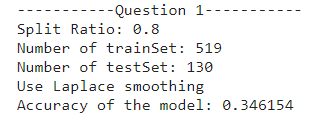

#### c.
- From last question, the accuracy is 0.346154, after running this classifier multiple times, I found that the accuracy was in the range of 0.3-0.4.
- After manually inspects a few instances for my result, I found that:
- 1) The correct rate is higher when the prediction is class D.
- 2) The error rate is higher when the prediction is class A or class B.
- 3) There is no correct prediction when the prediction is class A+.

### Question 2:
#### a.
##### (i) Explain the intuition behind accuracy, precision, recall, and F1-measure
- Accuracy is the ratio of correctly predicted observation to the total observations.
(Accuracy = TP+TN/TP+FP+FN+TN)
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
(Precision = TP/TP+FP)
- Recall is the ratio of correctly predicted positive observations to the total actually positive observations.
(Recall = TP/TP+FN)
- F1 Score is the weighted average of Precision and Recall.

##### (ii) contrast their utility
- These parameters are all userd to measure the performance of a model, but there are some differences. Precision reflects the ability of the model to distinguish negative samples since FP determine the precision, higher precision means lower FP. Recall reflects the ability of the model to identify positive samples since FN determine the recall, higher recall means lower FN. Precision/Recall are typically in an inverse relationship. F1 score is a combination of precision and recall. The higher the F1 score, the more robust the model.

##### (iii) discuss the difference between micro and macro averaging in the context of the data set.
- Macro averaging just take the average of the precision and recall of the system on different sets: 
- **Precision_macro = (precision(A) + precision(B))/2, Recall_macro = (recall(A) + recall(B))/2**
- the Macro-average F-Score will be simply the harmonic mean of these two figures.
- In Micro-average method, you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics.
- **Precision_micro =(TP_A+TP_B)/(TP_A+TP_B+FP_A+FP_B), Recall_micro =(TP_A+TP_B)/(TP_A+TP_B+FN_A+FN_B)**
- The Micro-average F-Score will be simply the harmonic mean of these two figures.
- In conclusion, Macro-average gives each class the same weight, while for Micro-average, it is mainly determined by the correctly predicted positive observations(ie. TP) of each class.

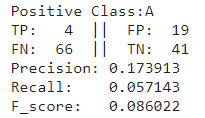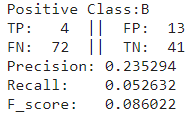
#### b.

##### Precision, recall and f-1 measure for each class:

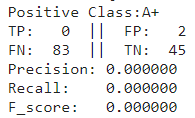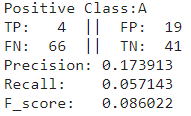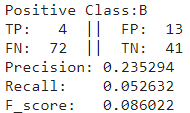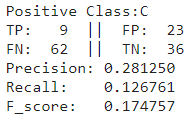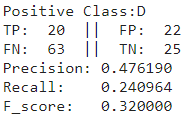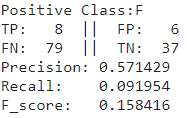

##### Macro-averaging :

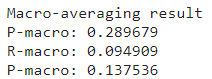

***Findings:***
- By analyzing the results of Macro-averaging, we can find that this model have high precision and low recall, and both are less than the accurracy. So it can be inferred that The precision and recall of a model will lower than the accuracy; and the model with higher precision will get lower recall, vice versa.

- By analyzing the results of each class:
- 1) the precision, recall and f-1 measure of class A+ is 0, which indicates there is no correct prediction for A+(since TP = 0).
- 2) For the class D, since it get the highest recall and recall reflects the ability of the model to identify positive samples, the correct rate for this model to predict class D is highest.
- 3) Meanwhile, the f-1 score of class D is also the highest, which means prediction of class D from this model is more reliable.

### Question 3:

#### a.

##### (i) describe how it works
- I select the k-fold cross-validation and the process is as follows:
- *step1*: Shuffle the data set randomly.
- *step2*: Split the data set into k folds.
- *step3*: For each fold, do the following: ***i)*** Use the data of this fold as a test set. ***ii)*** Use the remaining k-1 folds of data are used as training sets. ***iii)*** Use the test set to train the model and evaluate it on the test set.
- *step4*: Use the average of k evaluation scores to summarize the performance of the model.

##### (ii) explain why it is preferable over hold-out evaluation.
- For k-fold cross-validation, every instance is a test instance.
- k-fold cross-validation is very reproducible.
- Using the holdout method, we divide the initial dataset into two parts: a training dataset and a test dataset. However, in actual machine learning applications, we often need to repeatedly debug and compare different parameter settings to improve the model's prediction performance on new data sets. If we reuse the test set, the model is prone to over-fitting. Use k-fold cross-validation can reduce the over-fitting problem from holdout method.

#### b
- I chose 5-fold cross-validation since the split ratio of holdout is 0.8 (to keep ratio same).

##### Result of 5-fold cross-validation:

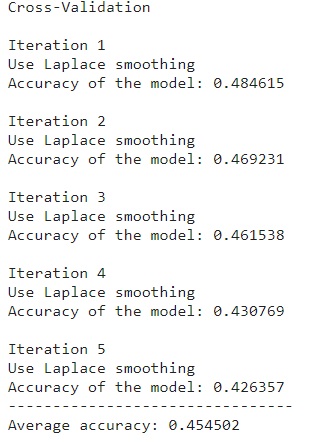

- From the image above we can find that the accuracy of hold-out was in the range of 0.3-0.4, while the accuracy of 5-fold cross-validation was in the range of 0.4-0.5, which indicates that the model with k-fold cross-validation is better than the model with hold-out strategy.
